In [90]:
import os
import pandas as pd

full_df = pd.read_csv(os.path.join('..', 'Datasets', 'Clean', 'weather.csv'))

columns = [
    'Min Temp',
    'Max Temp',
    'Total Precipitation',
    #'Max Gust',
    'Min Humidity',
    'Max Humidity',
    'Min Wind Speed',
    'Max Wind Speed',
    'Min Visibility',
    'Max Visibility',
    'Min Pressure',
    'Max Pressure',
]

def create_df(y_name):
    new_df = full_df[[ 'Date', y_name ]].copy()
    
    new_df.rename({
        'Date': 'ds',
        y_name: 'y'
    }, axis=1, inplace=True)
    
    return new_df

22:46:32 - cmdstanpy - INFO - Chain [1] start processing
22:46:32 - cmdstanpy - INFO - Chain [1] done processing
22:46:34 - cmdstanpy - INFO - Chain [1] start processing
22:46:35 - cmdstanpy - INFO - Chain [1] done processing
22:46:36 - cmdstanpy - INFO - Chain [1] start processing
22:46:36 - cmdstanpy - INFO - Chain [1] done processing
22:46:38 - cmdstanpy - INFO - Chain [1] start processing
22:46:38 - cmdstanpy - INFO - Chain [1] done processing
22:46:40 - cmdstanpy - INFO - Chain [1] start processing
22:46:41 - cmdstanpy - INFO - Chain [1] done processing
22:46:42 - cmdstanpy - INFO - Chain [1] start processing
22:46:42 - cmdstanpy - INFO - Chain [1] done processing
22:46:44 - cmdstanpy - INFO - Chain [1] start processing
22:46:44 - cmdstanpy - INFO - Chain [1] done processing
22:46:46 - cmdstanpy - INFO - Chain [1] start processing
22:46:46 - cmdstanpy - INFO - Chain [1] done processing
22:46:47 - cmdstanpy - INFO - Chain [1] start processing
22:46:48 - cmdstanpy - INFO - Chain [1]

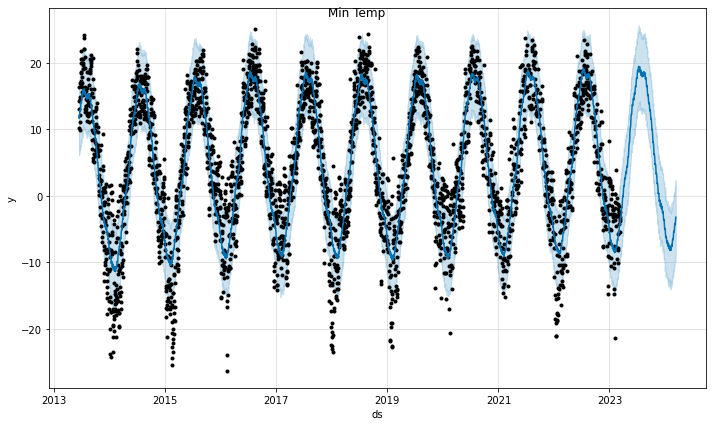

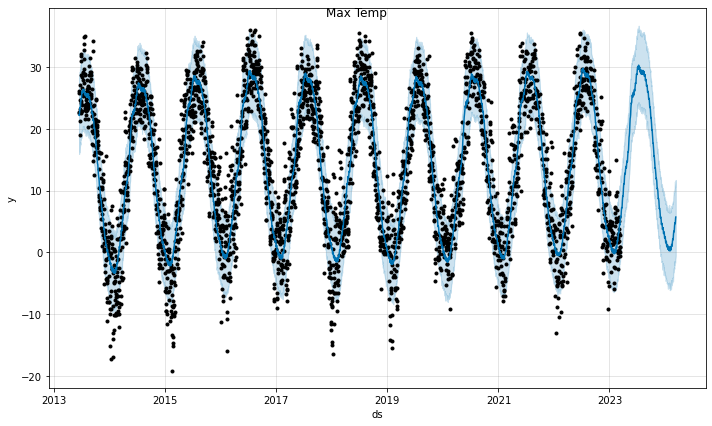

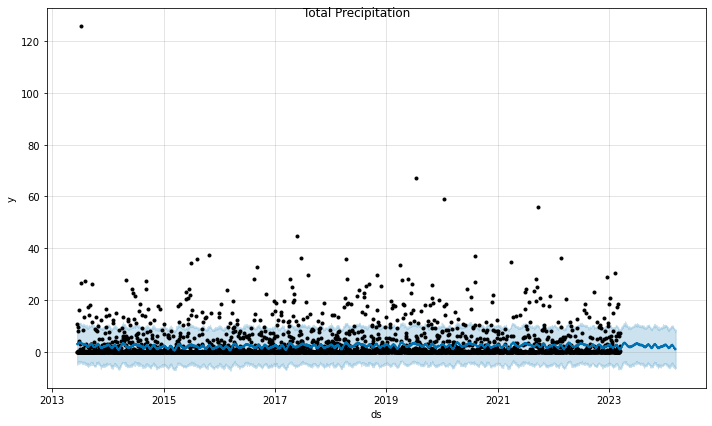

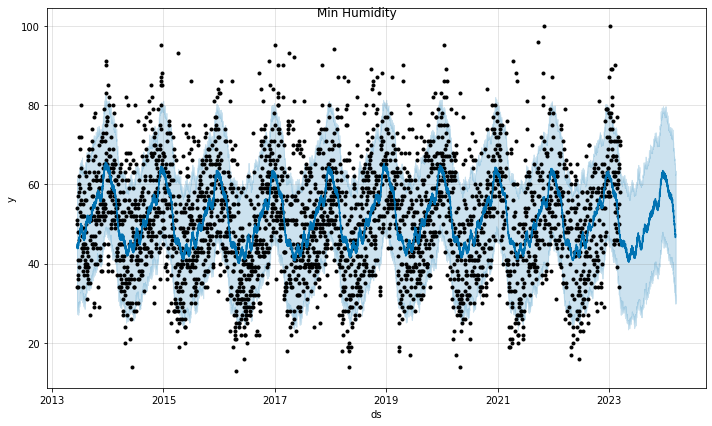

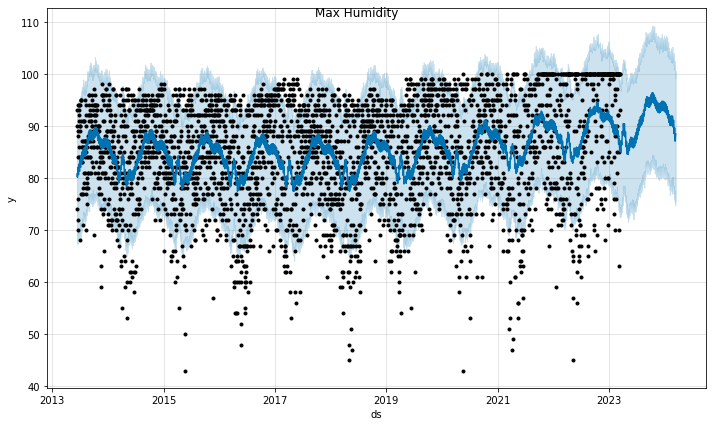

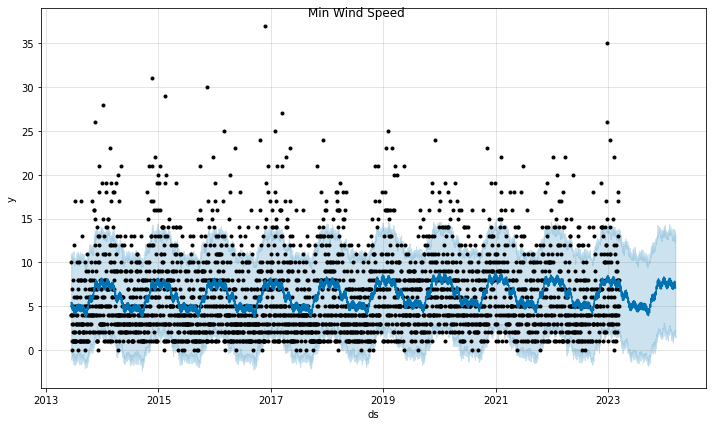

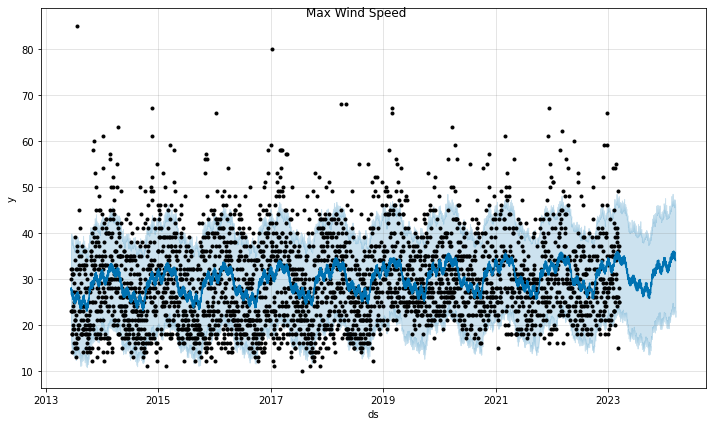

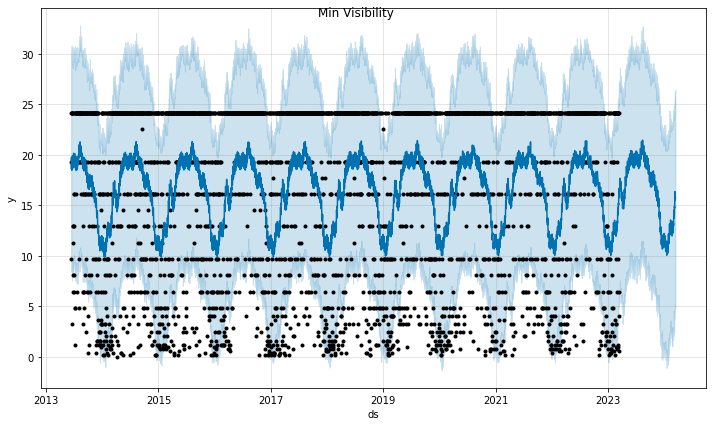

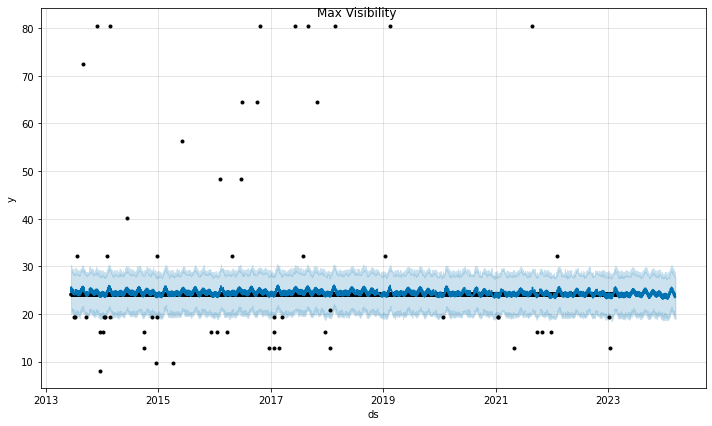

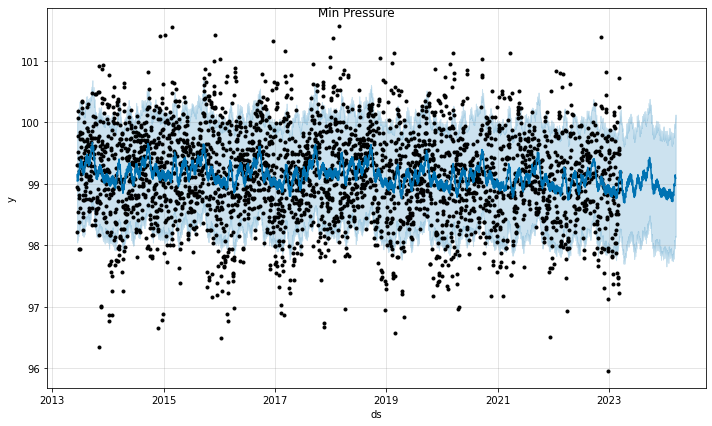

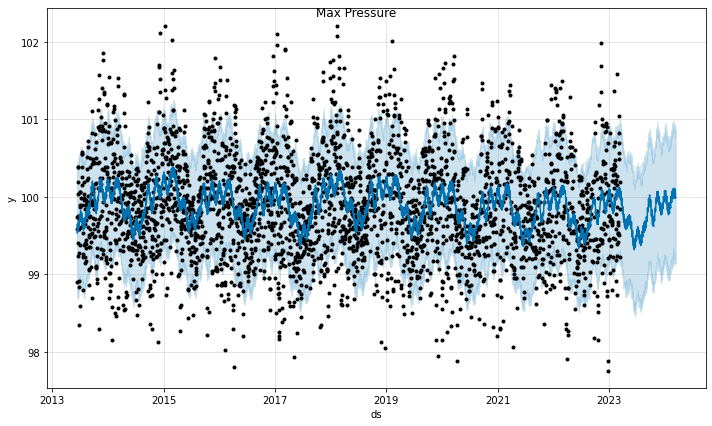

In [91]:
import os
import pandas as pd
import json
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json

# Function to train a Prophet model on a specific column
def create_prophet_model(column):
    temp_df = create_df(column)
    
    prophet = Prophet()
    prophet.fit(temp_df)
    
    # Sanitize the column name to create a model name
    model_name = column.replace(' ', '_').lower()

    with open(os.path.join('..', 'Models', model_name + '.json'), 'w') as f:
        f.write(model_to_json(prophet))

    future_df = prophet.make_future_dataframe(periods=365)

    predict_df = prophet.predict(future_df)


    plot = prophet.plot(predict_df)
    plot.suptitle(column)

for column in columns:
    create_prophet_model(column)

In [89]:
import os
import pickle
import pandas as pd
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

cond_col = [
    #'Year',
    'Month',
    'Day',
    'Min Temp',
    'Max Temp',
    'Total Precipitation',
    #'Max Gust',
    'Min Humidity',
    'Max Humidity',
    'Min Wind Speed',
    'Max Wind Speed',
    'Min Visibility',
    'Max Visibility',
    'Min Pressure',
    'Max Pressure',
]

X = full_df[cond_col].values
y = full_df['Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=False)

classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=42)
classifier.fit(X_train, y_train)

with open(os.path.join('..', 'Models', 'condition.pkl'), 'wb') as f:
    pickle.dump(classifier, f)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8663594470046083